In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import psutil
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Class 0", "Class 1"]

In [2]:
df = pd.read_csv('spneodeath_clean.csv')
df.describe()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
count,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,...,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06
mean,1.012354e+00,2.823321e+01,2.090997e+00,4.216266e+00,8.275971e-01,2.395071e-01,4.879380e+00,1.029510e+00,1.567570e+00,3.723224e+00,...,2.271142e+00,1.058415e+00,5.264887e-01,3.196121e-01,3.833380e+01,1.046613e+00,1.208808e+00,3.905048e+00,3.953085e+00,6.127716e-03
std,1.542648e-01,6.687282e+00,1.375772e+00,6.304390e-01,1.104993e+00,5.728221e-01,4.320864e-01,1.747430e-01,4.954134e-01,5.798743e-01,...,1.432523e+00,1.306026e+00,1.030181e+00,6.354840e-01,2.111963e+00,2.206736e-01,4.253384e-01,1.445278e+00,2.616306e+00,7.803955e-02
min,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.300000e+01,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,1.000000e+00,2.800000e+01,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00
75%,1.000000e+00,3.300000e+01,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00
max,4.000000e+00,6.300000e+01,9.000000e+00,9.000000e+00,1.800000e+01,1.900000e+01,6.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,...,5.000000e+00,3.900000e+01,8.000000e+01,8.000000e+01,4.600000e+01,3.000000e+00,4.000000e+00,5.000000e+00,1.100000e+01,1.000000e+00


In [3]:
df.head()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
0,1,32,2.0,4.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0,1,39,1.0,1.0,5.0,5.0,0
1,1,40,1.0,3.0,4,1,5.0,1.0,2.0,4,...,4.0,5,4,0,40,2.0,1.0,5.0,7.0,0
2,1,31,2.0,5.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0,1,39,1.0,1.0,2.0,5.0,0
3,1,19,5.0,4.0,2,0,5.0,1.0,1.0,4,...,4.0,2,2,0,39,1.0,1.0,5.0,4.0,0
4,1,33,1.0,4.0,5,0,5.0,1.0,1.0,2,...,2.0,5,5,0,40,1.0,2.0,2.0,3.0,0


Class 0: 1269322
Class 1: 7826
Proportion: 162.19 : 1


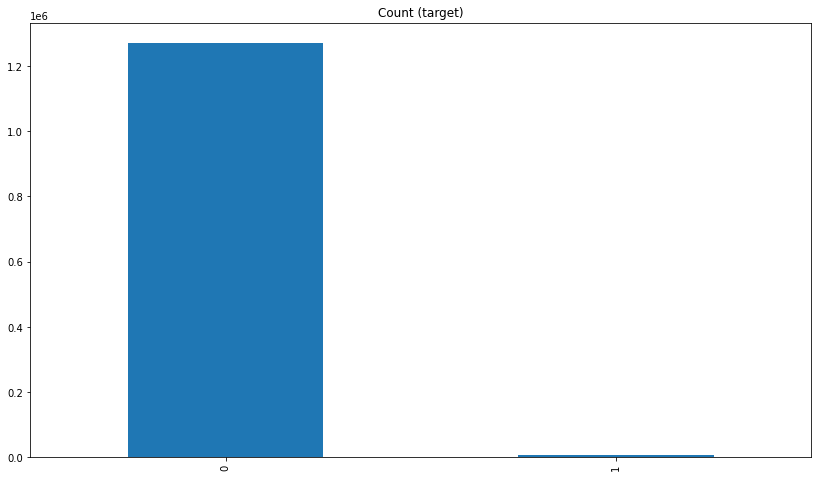

In [4]:
target_count = df.neonatal_death.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [7]:

#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["neonatal_death"]]
# Store the variable we are predicting 
target = "neonatal_death"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(1277148, 23)
(1277148,)


In [8]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

X_res.shape,y_res.shape

((15652, 23), (15652,))

In [9]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1269322, 1: 7826})
Resampled dataset shape Counter({0: 7826, 1: 7826})


In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=3)

In [15]:
from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(random_state=0,solver='lbfgs', max_iter=888517)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[2188  183]
 [ 158 2167]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2371
           1       0.92      0.93      0.93      2325

    accuracy                           0.93      4696
   macro avg       0.93      0.93      0.93      4696
weighted avg       0.93      0.93      0.93      4696

